# Diabetes Patients Predictive Analysis.

## <font color=Red>**Project Overview:**</font>

* This project aims to employ predictive analysis for diabetes diagnosis using a dataset obtained from the National Institute of Diabetes and Digestive and Kidney Diseases. Focused on Pima Indian heritage females aged 21 or older, the dataset includes medical and demographic variables. 

* The primary goal is to develop a diagnostic predictive model for diabetes using the provided diagnostic measurements and demographic information.

## <font color=Red>**Dataset Description:**</font>

| Features                 | Description                                             |
|--------------------------|---------------------------------------------------------|
| *Pregnancies*            | The number of pregnancies a patient has had.          |
| *Glucose*                | Plasma glucose concentration, an indicator of blood sugar levels. |
| *BloodPressure*          | Diastolic blood pressure.                               |
| *SkinThickness*          | Skinfold thickness, which may be related to body composition. |
| *Insulin*                | 2-Hour serum insulin level.                             |
| *BMI*                    | A measure of body weight and height, indicating body fat. |
| *DiabetesPedigreeFunction* | A measure of the diabetes heredity risk based on family history. |
| *Age*                    | The age of the patient in years.                        |
| *Outcome*                | The target variable indicating whether the patient has diabetes (1 for positive, 0 for negative). |


## <font color=Red>**Importing Important Libraries For This Project**</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
#Spliting Data into Train and Test:
from sklearn.model_selection import train_test_split 
#For Feature Scaling:
from sklearn.preprocessing import StandardScaler 
#Support Vector Machine:
from sklearn.svm import SVC
#Logistic Regression:
from sklearn.linear_model import LogisticRegression
#Evaluation:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#For ignoring  warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Dataset
df = pd.read_csv(r"C:\Users\Manikanta\Downloads\MeriSkill\Diabetes Data Project 2\diabetes.csv")

In [3]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## <font color=Red>**Data Exploration**</font>

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

## <font color=Red>**Number of Rows and  Columns in Dataset**</font>

In [6]:
df.shape
print("Total Number of Rows in Dataset  :",df.shape[0])
print("Total Number of Columns in Dataset:",df.shape[1])

Total Number of Rows in Dataset  : 768
Total Number of Columns in Dataset: 9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## <font color=Red>**Heatmap to Check Missing Values in Dataset**</font>

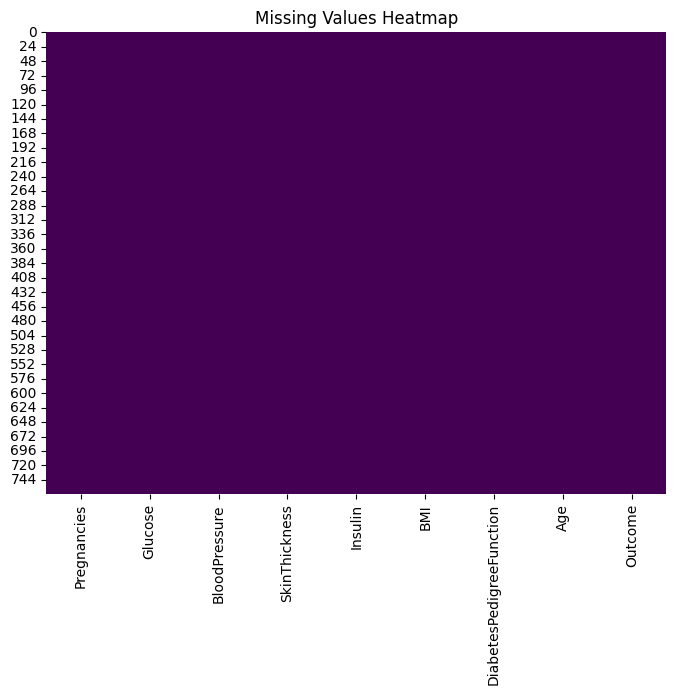

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

<font color=navy>**We have verified that the dataset is free of any missing or null values.**</font>

## <font color=red>**Overall Statistics About The Dataset**</font>

In [9]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## **<font color=red>Data Summary Report</font>**

| Features                 | Description                                             |
|--------------------------|---------------------------------------------------------|
| **Pregnancies**         | Most data falls within the range of 1 to 6 pregnancies.          |
| **Glucose**             | Glucose levels are typically distributed between 99 to 140. |
| **BloodPressure**       | Most values fall within the 62 to 80 range.                               |
| **SkinThickness**       | A significant portion of the data has values between 0 and 32. |
| **Insulin**             | A substantial portion of the data has low insulin values.                             |
| **BMI**                 | Most values fall in the range of 27.3 to 36.6. |
| **DiabetesPedigreeFunction** | The majority of values are below 0.626. |
| **Age**                 | Most of the data represents individuals between the ages of 24 and 41.                        |
| **Outcome**             | The dataset appears to be imbalanced, with a lower number of positive outcomes (diabetes) compared to negative outcomes (no diabetes). |


## **<font color=red>Checking Outliers</font>**

In [10]:
import plotly.graph_objs as go

box_traces = [go.Box(y=df[column], name=column) for column in df.columns if column != 'Outcome']
go.Figure(box_traces, layout=go.Layout(title='Box Plots for Dataset Columns')).show()

<font color=navy>**Outliers have been identified in our dataset.**</font>

## <font color=red>**Managing Outliers in Dataset**</font>

In [11]:
#Create a function to handle Outliers
def remove_outliers(data, column_name):
    Q1, Q3 = data[column_name].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return data.clip(lower={lower_limit}, upper={upper_limit}, axis=1)

In [12]:
import plotly.graph_objs as go

box_traces = [go.Box(y=df[column], name=column) for column in df.columns if column != 'Outcome']
fig = go.Figure(data=box_traces, layout=go.Layout(title='Box Plots for Dataset Columns')).show()

<font color=navy>**After handling outliers , the datatype of some columns has changed to float. We also need to convert them back to int32.**</font>

In [13]:
df[['Pregnancies', 'Glucose', 'Insulin']] = df[['Pregnancies', 'Glucose', 'Insulin']].round().astype('int32')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int32(3), int64(4)
memory usage: 45.1 KB


## <font color=red>**Visualizing the Dataset for Better Understanding:**</font>

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

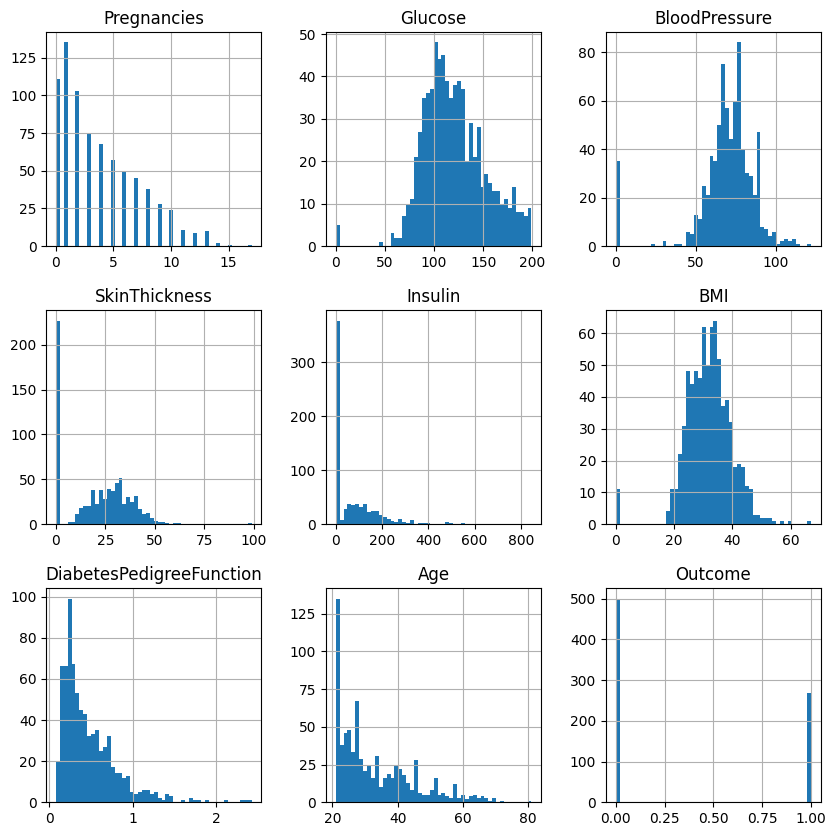

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 10))
df.hist(bins=50, ax=ax)

# Show the plot
plt.show()


<font color=red>**Observations:**</font>

<font color=navy>**Distributions are mostly skewed to the right**</font>

<font color=navy>**Small peaks at higher values for glucose, blood pressure, skin thickness, insulin, BMI, and diabetes pedigree function**</font>

<font color=navy>**Bimodal distribution for outcome variable (diabetes vs. no diabetes)**</font>

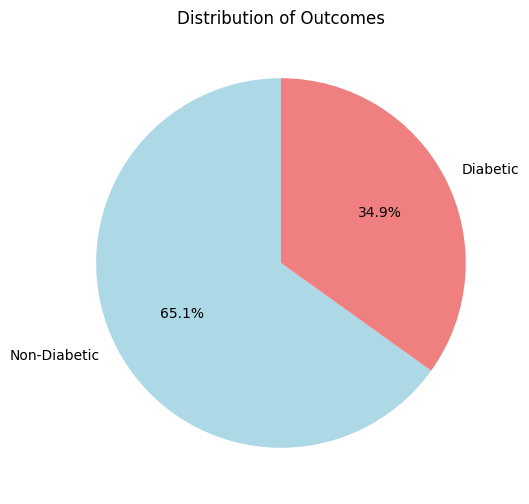

In [17]:
# Count the occurrences of each outcome value
outcome_counts = df['Outcome'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Outcomes')
plt.show()


<font color=navy>**Converting Numerical Features into Categorical Features  for Data Clarity:**</font>

## <font color=red>**Create bins for the 'Pregnancies' column**</font>

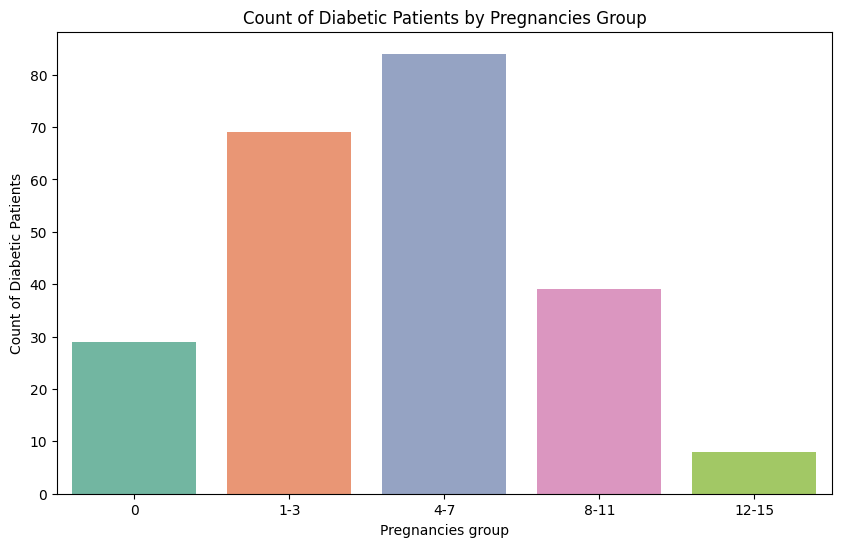

In [18]:
pregnancies_bins = [0, 1, 4, 8, 12, 16]
pregnancies_labels = ['0', '1-3', '4-7', '8-11', '12-15']

# Filter the dataset to include only records with 'Outcome' equal to 1 (Diabetic patients)
diabetic_df = df[df['Outcome'] == 1]

plt.figure(figsize=(10, 6))
sns.countplot(data=diabetic_df, x=pd.cut(diabetic_df['Pregnancies'], bins=pregnancies_bins, labels=pregnancies_labels), order=pregnancies_labels, palette="Set2")
plt.xlabel('Pregnancies group')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Pregnancies Group')
plt.show()


## <font color=red>**Create age groups based on the 'Age' column**</font>

In [19]:
bins = [20, 30, 40, 50, 60, 70, 80, 200]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [20]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 200], labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'], right=False)

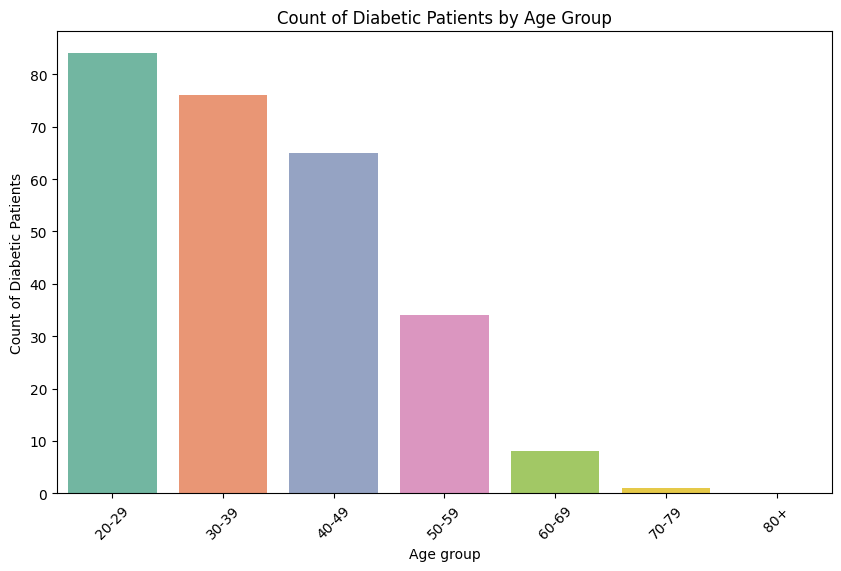

In [21]:
diabetic_df = df[df['Outcome'] == 1]

# Assuming labels are defined earlier in your code
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

plt.figure(figsize=(10, 6))
sns.countplot(data=diabetic_df, x='AgeGroup', order=labels, palette="Set2")
plt.xlabel('Age group')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Age Group')
plt.xticks(rotation=45)
plt.show()

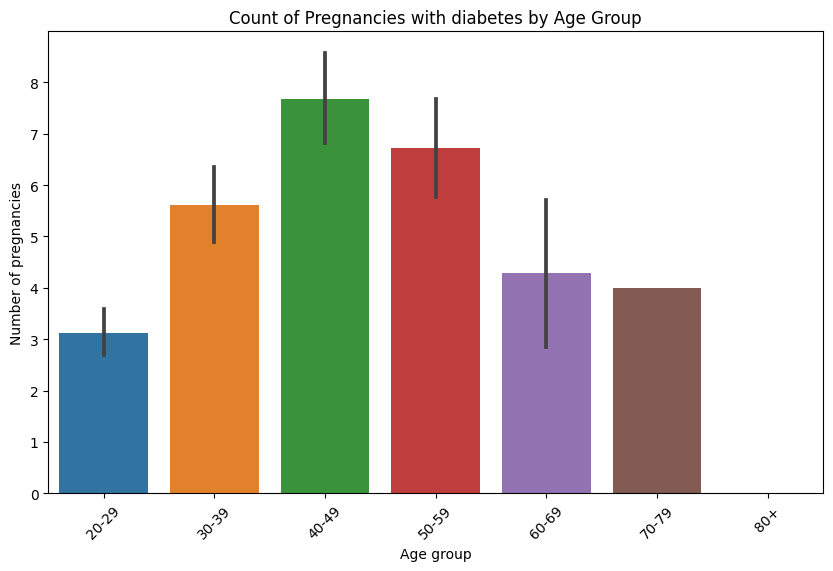

In [22]:
new_df = df[(df['Outcome'] == 1) & (df['Pregnancies'] > 0)]
# Create a bar chart with 'Outcome' as hue
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=new_df, x='AgeGroup', y='Pregnancies')
plt.xlabel('Age group')
plt.ylabel('Number of pregnancies')
plt.title('Count of Pregnancies with diabetes by Age Group')
plt.xticks(rotation=45)


plt.show()


## <font color=red>**Define the bins and labels for 'BloodPressure'**</font>

In [23]:
# Define the bins and labels for 'BloodPressure'
blood_pressure_bins = [0, 80, 89, 99, 119, 1000]  # Adjust the boundaries as needed
blood_pressure_labels = ['Low', 'Normal', 'Prehypertension', 'Stage 1 hypertension', 'Stage 2 hypertension']

# Create a new column 'BloodPressureCategory' based on the bins and labels
df['BloodPressureCategory'] = pd.cut(df['BloodPressure'], bins=blood_pressure_bins, labels=blood_pressure_labels,right=False)

df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome AgeGroup BloodPressureCategory  
0                     0.627   50        1    50-59                   Low  
1                     0.351   31        0    30-39                   Low  
2                     0.672   32        1    30-39                   Low  
3                     0.167   21        0    20-29                   Low  
4                     2.288   33        1    30-39                   Low

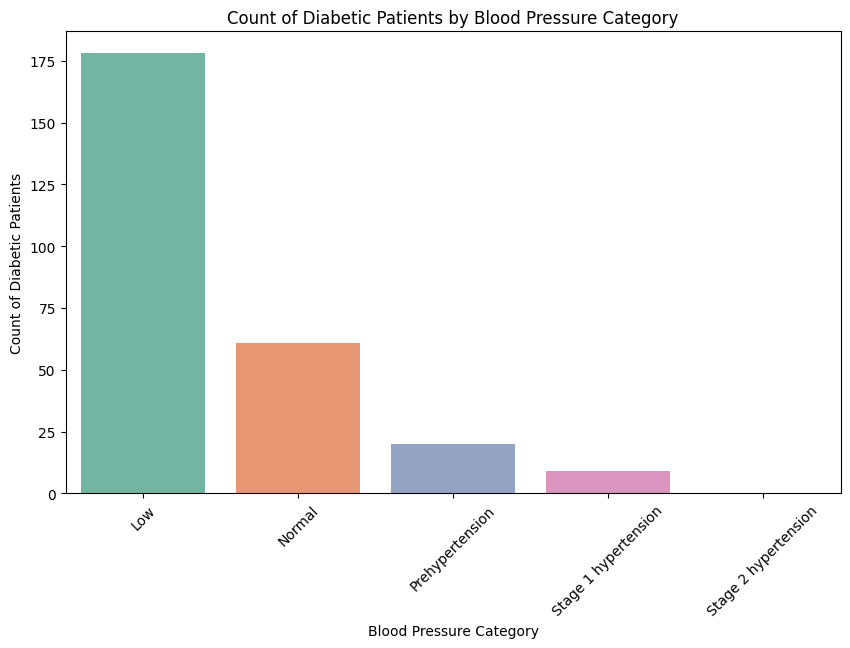

In [24]:
# Filter the dataset to include only records with 'Outcome' equal to 1 (Diabetic patients)
diabetic_df = df[df['Outcome'] == 1]

# Create a bar chart for Diabetic patients with 'BloodPressureCategory' as the x-axis
plt.figure(figsize=(10, 6))
sns.countplot(data=diabetic_df, x='BloodPressureCategory', order=blood_pressure_labels, palette="Set2")
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Blood Pressure Category')
plt.xticks(rotation=45)
plt.show()


## <font color=red>**Define the bins and labels for 'SkinThickness'**</font>

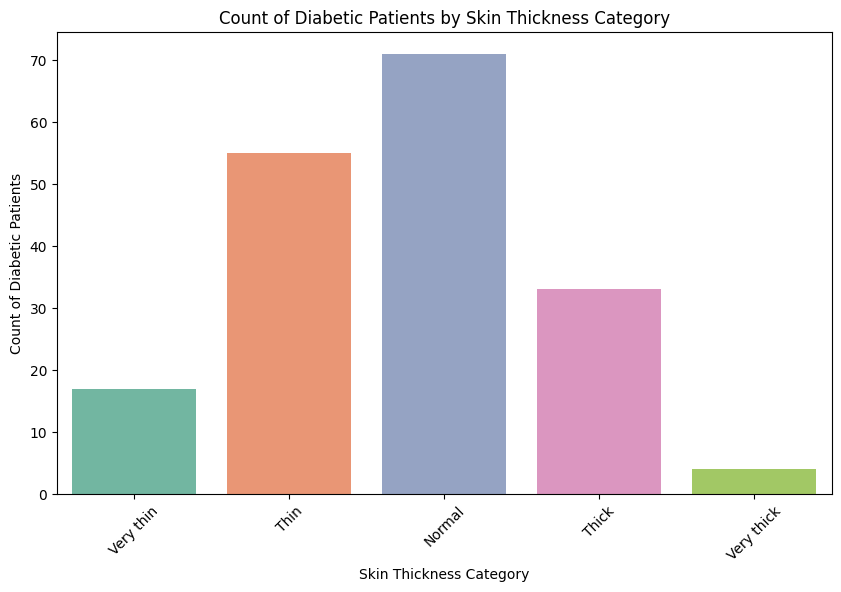

In [25]:
skin_thickness_bins = [0, 20, 30, 40, 50, 100]
skin_thickness_labels = ['Very thin', 'Thin', 'Normal', 'Thick', 'Very thick']

df['SkinThicknessCategory'] = pd.cut(df['SkinThickness'], bins=skin_thickness_bins, labels=skin_thickness_labels)

diabetic_df = df[df['Outcome'] == 1]

plt.figure(figsize=(10, 6))
sns.countplot(data=diabetic_df, x='SkinThicknessCategory', order=skin_thickness_labels, palette="Set2")
plt.xlabel('Skin Thickness Category')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Skin Thickness Category')
plt.xticks(rotation=45)
plt.show()


## <font color=red>**Define the custom bins and labels for 'BMI'**</font>

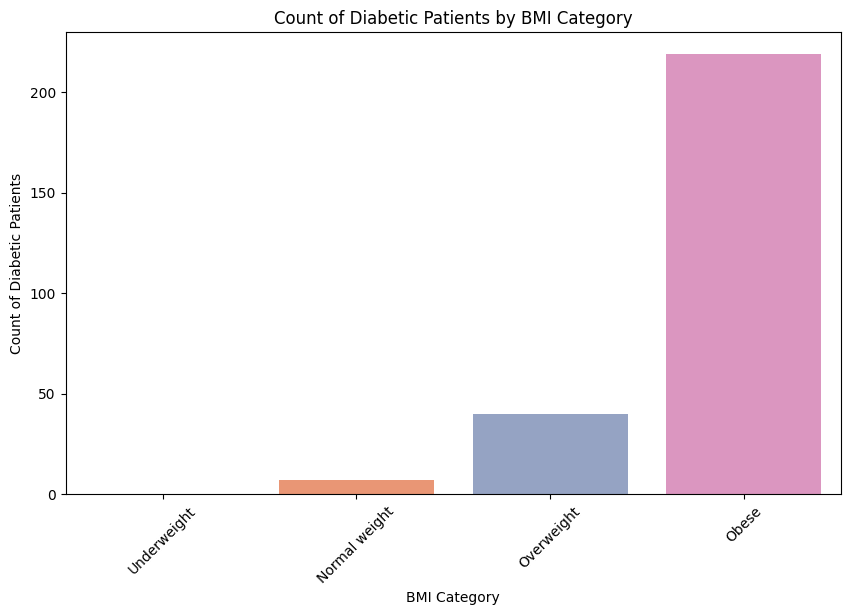

In [26]:
bmi_bins = [0, 18.5, 24.9, 29.9, 1000]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

df['BMICategory'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

diabetic_df = df[df['Outcome'] == 1]

plt.figure(figsize=(10, 6))
sns.countplot(data=diabetic_df, x='BMICategory', order=bmi_labels, palette="Set2")
plt.xlabel('BMI Category')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by BMI Category')
plt.xticks(rotation=45)
plt.show()


## <font color=red>**Define the custom bins and labels for 'Insulin'**</font>

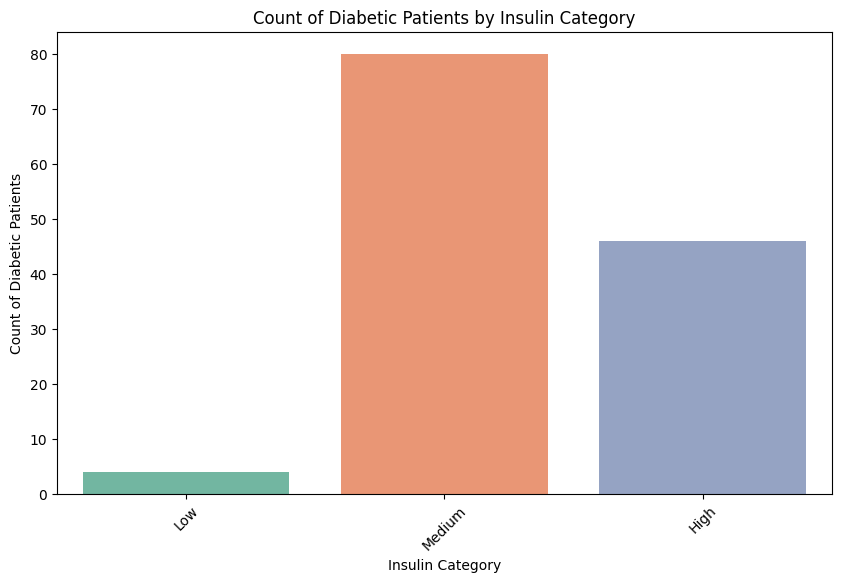

In [27]:
insulin_bins = [0, 50, 200, 10000]  
insulin_labels = ['Low', 'Medium', 'High']

df['InsulinCategory'] = pd.cut(df['Insulin'], bins=insulin_bins, labels=insulin_labels)

diabetic_df = df[df['Outcome'] == 1]

plt.figure(figsize=(10, 6))
sns.countplot(data=diabetic_df, x='InsulinCategory', order=insulin_labels, palette="Set2")
plt.xlabel('Insulin Category')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Insulin Category')
plt.xticks(rotation=45)
plt.show()


## <font color=red>**Define the custom bins and labels for 'Glucose'**</font>

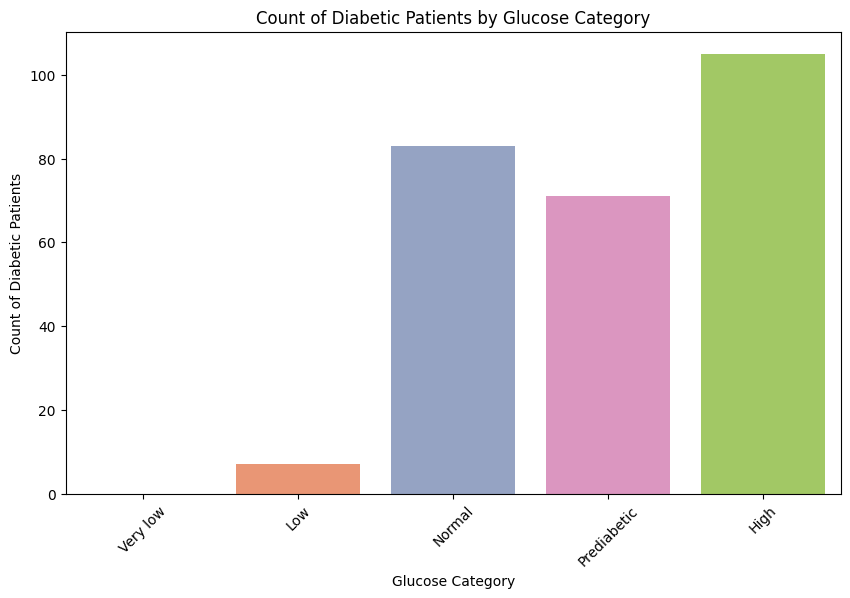

In [28]:
glucose_bins = [0, 75, 90, 125, 150, 1000]  
glucose_labels = ['Very low', 'Low', 'Normal', 'Prediabetic', 'High']

df['GlucoseCategory'] = pd.cut(df['Glucose'], bins=glucose_bins, labels=glucose_labels)

diabetic_df = df[df['Outcome'] == 1]

plt.figure(figsize=(10, 6))
sns.countplot(data=diabetic_df, x='GlucoseCategory', order=glucose_labels, palette="Set2")
plt.xlabel('Glucose Category')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Diabetic Patients by Glucose Category')
plt.xticks(rotation=45)
plt.show()


## <font color=red>Data Wrangling:</font>

### <font color=navy>**Seprate Independent Variable(X) and Dependent Variable(y)**</font>

In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'AgeGroup',
       'BloodPressureCategory', 'SkinThicknessCategory', 'BMICategory',
       'InsulinCategory', 'GlucoseCategory'],
      dtype='object')

In [30]:
#Independent Variables
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
#Target variable
y = df['Outcome']

In [31]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [32]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## <font color=red>Split the data into Training and Testing sets</font>

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

## <font color=red>Feature Scaling</font>

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
X_train

array([[-0.85811767,  0.06488386,  0.25332145, ..., -0.51313743,
        -1.10316947, -0.27704152],
       [-0.85811767, -0.84697246,  0.66358026, ...,  0.4081093 ,
        -0.71238555,  0.84376203],
       [-1.15412006, -0.87841578,  0.04819205, ...,  1.49569224,
        -0.37742791, -1.05298243],
       ...,
       [ 0.02988949,  0.09632718,  0.04819205, ..., -0.3723914 ,
         1.96433735,  1.01619334],
       [-0.2661129 , -0.18666271,  0.25332145, ..., -0.70506383,
        -1.08260189, -0.79433546],
       [ 0.02988949, -0.37532264, -0.15693736, ...,  0.0114614 ,
        -0.01308802, -0.36325717]])

## <font color=red>Train a Modal</font>

### <font color=red>SVM:</font>

In [36]:
# Training the SVM model
sv_model = SVC(C=0.1, kernel='linear', random_state=15).fit(X_train, y_train)

# Predictions
sv_pred_train = sv_model.predict(X_train)
sv_pred_test = sv_model.predict(X_test)

# Evaluation
SVM_Train_Accuracy, SVM_Test_Accuracy = accuracy_score(y_train, sv_pred_train) * 100, accuracy_score(y_test, sv_pred_test) * 100
SVM_CV = cross_val_score(sv_model, X_test, y_test, cv=5, scoring="accuracy").mean() * 100

print(f"Train Accuracy: {SVM_Train_Accuracy:.2f}%")
print(f"Test Accuracy: {SVM_Test_Accuracy:.2f}%")
print(f"Cross Validation Score: {SVM_CV:.2f}%")

Train Accuracy: 77.36%
Test Accuracy: 75.97%
Cross Validation Score: 74.02%


## <font color=red>LogisticRegression</font>

In [37]:
# Training the logistic regression model
logistic = LogisticRegression(C=100, penalty='l1', solver='liblinear', random_state=16).fit(X_train, y_train)

# Predictions
log_pred_train = logistic.predict(X_train)
log_pred_test = logistic.predict(X_test)

# Evaluation
log_Train_Accuracy, log_Test_Accuracy = accuracy_score(y_train, log_pred_train) * 100, accuracy_score(y_test, log_pred_test) * 100
Log_CV = cross_val_score(logistic, X_test, y_test, cv=5, scoring="accuracy").mean() * 100

print(f"Train Accuracy: {log_Train_Accuracy:.2f}%")
print(f"Test Accuracy: {log_Test_Accuracy:.2f}%")
print(f"Cross Validation Score: {Log_CV:.2f}%")

Train Accuracy: 78.01%
Test Accuracy: 76.62%
Cross Validation Score: 75.31%


## <font color="red">Conclusion</font>

* After assessing performance metrics, particularly for Support Vector Machine and Logistic Regression, the Logistic Regression model excels in maximizing accuracy for predicting Diabetic Patients. 

* Therefore, we recommend utilizing Logistic Regression for this purpose, given its superior performance based on the available data and evaluation metrics.

## <font color="red">Developing a Prediction System</font>

In [38]:
import numpy as np

# Scaling input data and making prediction
input_data = (2, 174, 88, 37, 120, 44.5, 0.646, 24)
prediction = logistic.predict(scaler.transform(np.asarray(input_data).reshape(1, -1)))

# Determining the result
result = 'diabetic' if prediction[0] == 1 else 'not diabetic'

print(f'The person is {result}')

The person is diabetic


## <font color="red">Graphical User Interface</font>

In [ ]:
import tkinter as tk
from tkinter import Label, Entry, Button
import numpy as np

def predict():
    input_data = [pregnancies_entry.get(), glucose_entry.get(), blood_pressure_entry.get(),
                  skin_thickness_entry.get(), insulin_entry.get(), bmi_entry.get(),
                  pedigree_function_entry.get(), age_entry.get()]

    std_input_data = scaler.transform(np.asarray(input_data, dtype=float).reshape(1, -1))
    prediction = logistic.predict(std_input_data)
    result = 'diabetic' if prediction[0] == 1 else 'not diabetic'
    result_label.config(text=f'Prediction: {result}')

root = tk.Tk()
root.title("Diabetes Prediction")

labels = ["Pregnancies", "Glucose", "Blood Pressure", "Skin Thickness",
          "Insulin", "BMI", "Diabetes Pedigree Function", "Age"]

entries = [Entry(root) for _ in range(8)]

for i, label_text in enumerate(labels):
    Label(root, text=label_text).grid(row=i, column=0)
    entries[i].grid(row=i, column=1)

predict_button = Button(root, text="Predict", command=predict)
predict_button.grid(row=8, columnspan=2)

result_label = Label(root, text="Prediction: ")
result_label.grid(row=9, columnspan=2)

root.mainloop()